## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sn
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots


In [2]:
matches = pd.read_csv("matchups.csv")

In [3]:
matches.head()

P_MATCH_ID  GOLDEARNED  TOTALMINIONSKILLED    WIN  KILLS  \
0     TR1_1201957752_top       14425                 194  False     14   
1     TR1_1201957752_top       12920                 177   True      3   
2  TR1_1201957752_middle       13483                 221  False      7   
3  TR1_1201957752_middle       11375                 167   True      4   
4  TR1_1201957752_bottom       11320                 197  False      5   

   ASSISTS  DEATHS  CHAMPION  VISIONSCORE  \
0        5       7  Kassadin           17   
1       13       6     Fiora           17   
2        3       6      Yone           20   
3       15       7     Corki           27   
4       10      12     Kaisa           17   

                                               PUUID  \
0  phduyQLB8gBjUerFwiVOtyLLHE9jxw7Jq7dwab_CtRddAv...   
1  SgQ5hm74vmXVDB3GIt3ka7gaBXFpNnT3PbHU8TbjEk5PJ8...   
2  m7Sxq9HxRKLIgf0n0QOKhfHq8jNMZ-k1VhW_jcb307sUya...   
3  pa-g2VGIEJn7CJCYYQU1PaHUqjS9pB7M4PsDcjM3ac5ysM...   
4  _WeC06P4yIMW7ZMWi6bmwCagXp7c7bxxGv6nNW4--SGqXp...   

   TOTALDAMAGEDEALTTOCHAMPIONS  SUMMONERNAME     GAMEVERSION  Unnamed: 13  
0                        33426         Borke  11.14.384.6677          NaN  
1                        12092    Nora Durst  11.14.384.6677          NaN  
2                        20604  Fightêr Yone  11.14.384.6677          NaN  
3                        30150   AM SORİİ HE  11.14.384.6677          NaN  
4                        16689  º J İ N X º   11.14.384.6677          NaN

P_MATCH_ID contains 3 factors. Split them

In [4]:
# splitting the P_MATCH_ID to Region, Match Id and Role
matches[['Region', 'match_id', 'role']] = matches['P_MATCH_ID'].str.split('_', expand=True)


Match_id is not unique among region, create an unique match_id

In [5]:
# Creating a unique identifier for match id 
matches['match_id'] = matches['match_id'].str.cat(matches[['Region']], sep='_')

In [6]:
# Creating a unique identifier for each player
matches['player_id']=matches['SUMMONERNAME'].str.cat(matches[['Region']], sep='_')

Drop unnecessary columns

In [7]:
# Dropping unnecessary columns
matches = matches.drop(columns = ['P_MATCH_ID', 'Unnamed: 13', 'GAMEVERSION','PUUID'])

In [8]:
matches.head()

GOLDEARNED  TOTALMINIONSKILLED    WIN  KILLS  ASSISTS  DEATHS  CHAMPION  \
0       14425                 194  False     14        5       7  Kassadin   
1       12920                 177   True      3       13       6     Fiora   
2       13483                 221  False      7        3       6      Yone   
3       11375                 167   True      4       15       7     Corki   
4       11320                 197  False      5       10      12     Kaisa   

   VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS  SUMMONERNAME Region  \
0           17                        33426         Borke    TR1   
1           17                        12092    Nora Durst    TR1   
2           20                        20604  Fightêr Yone    TR1   
3           27                        30150   AM SORİİ HE    TR1   
4           17                        16689  º J İ N X º     TR1   

         match_id    role         player_id  
0  1201957752_TR1     top         Borke_TR1  
1  1201957752_TR1     top    Nora Durst_TR1  
2  1201957752_TR1  middle  Fightêr Yone_TR1  
3  1201957752_TR1  middle   AM SORİİ HE_TR1  
4  1201957752_TR1  bottom  º J İ N X º _TR1

Check data for null values

In [9]:
matches[matches.isnull().any(axis=1)]

GOLDEARNED  TOTALMINIONSKILLED   WIN  KILLS  ASSISTS  DEATHS  \
398808         6051                  37  True      0       10       0   
1241011       17188                 239  True     11       14       4   
1303486        9579                  11  True      4       18       1   

         CHAMPION  VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS SUMMONERNAME  \
398808       Lulu           32                         3502          NaN   
1241011  Kassadin           20                        34659          NaN   
1303486     Janna           56                        11009          NaN   

        Region        match_id     role player_id  
398808     NA1  3993107745_NA1  utility       NaN  
1241011    BR1  2186840449_BR1   middle       NaN  
1303486    NA1  3990915292_NA1  utility       NaN

In [10]:
matches = matches[(matches.match_id != '3993107745_NA1') & (matches.match_id != '2186840449_BR1') & (matches.match_id != '3990915292_NA1')]

In [11]:
matches[matches.isnull().any(axis=1)]

Empty DataFrame
Columns: [GOLDEARNED, TOTALMINIONSKILLED, WIN, KILLS, ASSISTS, DEATHS, CHAMPION, VISIONSCORE, TOTALDAMAGEDEALTTOCHAMPIONS, SUMMONERNAME, Region, match_id, role, player_id]
Index: []

In [12]:
#finding out if the column has negative value
matches[(matches['Region']=='TR1') & (matches.WIN==True)&(matches.TOTALDAMAGEDEALTTOCHAMPIONS<0)]

GOLDEARNED  TOTALMINIONSKILLED   WIN  KILLS  ASSISTS  DEATHS CHAMPION  \
124050       15365                  22  True      6       11       9    Viego   

        VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS    SUMMONERNAME Region  \
124050           25                  -2147483648  I am Not PogPP    TR1   

              match_id    role           player_id  
124050  1149701131_TR1  jungle  I am Not PogPP_TR1

In [13]:
#Checking the values for the match 1149701131_TR1 to see if the other players also have negative value
matches[matches['match_id']=='1149701131_TR1']

GOLDEARNED  TOTALMINIONSKILLED    WIN  KILLS  ASSISTS  DEATHS  \
124042       12595                 154   True      5       14       5   
124043       11233                 159  False      7       10       3   
124044       11490                 118   True      9       15       7   
124045       12475                 204  False      8        6       5   
124046       14227                 167   True     10       11       3   
124047       13686                 239  False      5        9      10   
124048       12699                  47   True     11       18       5   
124049        7505                  30  False      1       10      13   
124050       15365                  22   True      6       11       9   
124051       12835                  58  False      8        3      10   

          CHAMPION  VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS    SUMMONERNAME  \
124042        Gnar           19                        24720         PulsarN   
124043       Poppy           21                        18618     hammerrblow   
124044        Ahri           11                        25908         OrionVw   
124045  Cassiopeia           19                        26243        Natskfel   
124046      Lucian           26                        24369      KIYICI2003   
124047       Sivir           17                        26653      StormRuler   
124048   Seraphine           76                        17649           XJ 13   
124049       Karma           75                        15456          Cuzack   
124050       Viego           25                  -2147483648  I am Not PogPP   
124051    MasterYi           13                        15564      Muthaarius   

       Region        match_id     role           player_id  
124042    TR1  1149701131_TR1      top         PulsarN_TR1  
124043    TR1  1149701131_TR1      top     hammerrblow_TR1  
124044    TR1  1149701131_TR1   middle         OrionVw_TR1  
124045    TR1  1149701131_TR1   middle        Natskfel_TR1  
124046    TR1  1149701131_TR1   bottom      KIYICI2003_TR1  
124047    TR1  1149701131_TR1   bottom      StormRuler_TR1  
124048    TR1  1149701131_TR1  utility           XJ 13_TR1  
124049    TR1  1149701131_TR1  utility          Cuzack_TR1  
124050    TR1  1149701131_TR1   jungle  I am Not PogPP_TR1  
124051    TR1  1149701131_TR1   jungle      Muthaarius_TR1

In [14]:
# dropping the data points with the corresponding match id 
matches=matches[matches.match_id!='1149701131_TR1']

## Analysing the Data

In [15]:
# Taking only numerical values 

mathces_num = matches[['GOLDEARNED', 'TOTALMINIONSKILLED', 'KILLS', 'ASSISTS', 'DEATHS',
       'CHAMPION', 'VISIONSCORE', 'TOTALDAMAGEDEALTTOCHAMPIONS','WIN']]

In [16]:
## EDA 

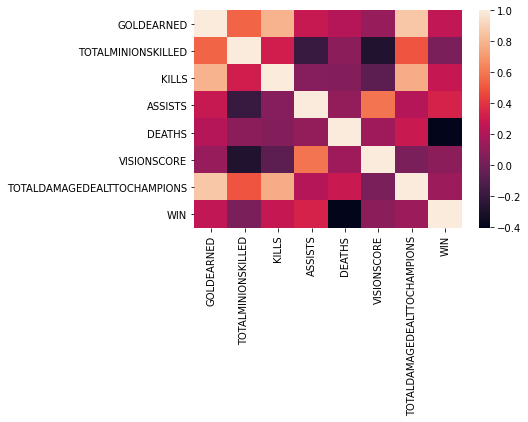

In [17]:
# FInding out the correlation between different features in the matrix 
corrMatrix = mathces_num.corr()
sn.heatmap(corrMatrix)#, annot=True)
plt.show()

### Inference
- It can be observed from the correlation matrix that Kills, Assits, Golds earned have  strong correlation with the independent variable 
- Deaths has a strong negative correlation, meaning higher the number of deaths lesser the probablity of wining 

array([[<AxesSubplot:title={'center':'GOLDEARNED'}>,
        <AxesSubplot:title={'center':'TOTALMINIONSKILLED'}>,
        <AxesSubplot:title={'center':'KILLS'}>],
       [<AxesSubplot:title={'center':'ASSISTS'}>,
        <AxesSubplot:title={'center':'DEATHS'}>,
        <AxesSubplot:title={'center':'VISIONSCORE'}>],
       [<AxesSubplot:title={'center':'TOTALDAMAGEDEALTTOCHAMPIONS'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

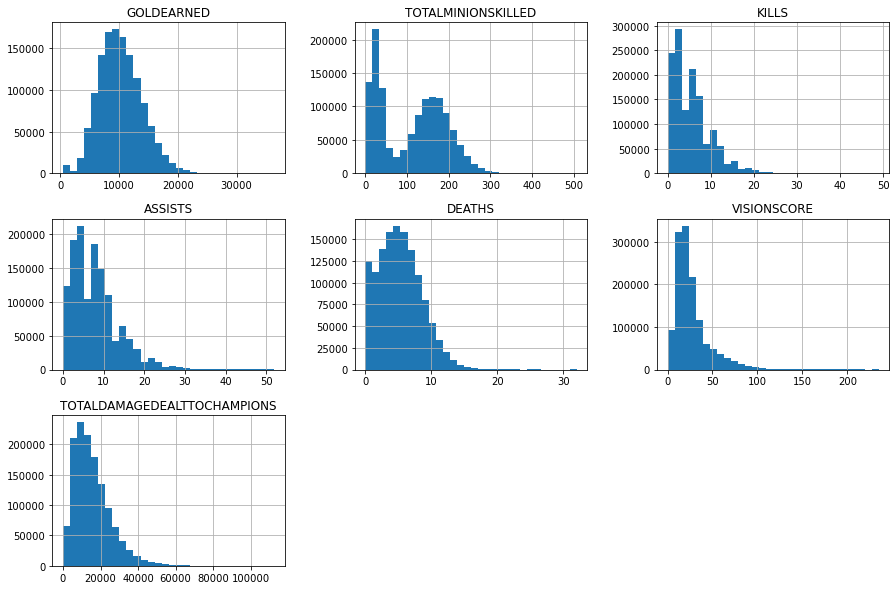

In [18]:
# plotting to understand the distribution of each feature
matches.hist(bins=30, figsize=(15, 10))

In [19]:
# Groupying by to find the average values of all wins and losses
df_avg = mathces_num.groupby(['WIN'], as_index=False).mean()

In [20]:
df_avg

WIN    GOLDEARNED  TOTALMINIONSKILLED     KILLS   ASSISTS    DEATHS  \
0  False   9334.761101          108.631567  4.184970  5.943870  6.669653   
1   True  11209.966498          113.778300  6.665611  9.762472  4.197887   

   VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS  
0    24.678433                 14262.683310  
1    27.892360                 17049.270095

In [21]:
# Using plotly to plot bar graph for each feature and understanding the effect of it on the independent variable
import plotly.graph_objects as go
fig = make_subplots(rows=3, cols=3, subplot_titles=("Kills","Assists", "Deaths","Gold Earned",'Total Minions Killed',
                                                   'Vision Score','Total Damage To Champions'))

fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['KILLS']),
    row=1, col=1
)

fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['ASSISTS']),
    row=1, col=2
)
fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['DEATHS']),
    row=1, col=3
)
fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['GOLDEARNED']),
    row=2, col=1
)
fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['TOTALMINIONSKILLED']),
    row=2, col=2
)
fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['VISIONSCORE']),
    row=2, col=3
)
fig.add_trace(
    go.Bar( x=df_avg['WIN'], y=df_avg['TOTALDAMAGEDEALTTOCHAMPIONS']),
    row=3, col=1
)

fig.update_layout(height=1000, width=900, showlegend=False,title_text="EDA - Analysing each independent feature on the dependent")
fig.show()



### Inference

- It can be observed that average number of kills and assists is higher for winning players
- Average deaths is higher for the loosing players, indicating that loosing teams die more 
- Total minios killed is nearly the same level for both the winning and loosing teams with winning team having slightly higher minion kills
- Winning players have more golds earned and have delivered more damage to champions 
- It can be inferred from the bar graphs that Kills, Assists, Deaths, Gold Earned, Total Damage to Champions would be vital in deciding who wins or losses 

In [22]:
# Groupying by territory to find better understand the traits 
df_avg_trr = matches.groupby(['WIN','Region'], as_index=False).mean()

In [23]:
df_avg_trr

WIN Region    GOLDEARNED  TOTALMINIONSKILLED     KILLS    ASSISTS  \
0   False    BR1   9569.594073          108.865324  4.477244   6.230471   
1   False   EUN1   9601.643202          108.933287  4.439343   6.165974   
2   False   EUW1   9442.107856          112.220425  4.125964   5.882812   
3   False    JP1   9093.217773          110.429991  3.760889   5.583163   
4   False     KR   8560.849123          103.471931  3.633102   5.336727   
5   False    LA1   9400.650426          109.837606  4.008143   5.945713   
6   False    LA2   9357.916197          109.098822  4.087814   5.926267   
7   False    NA1   9108.252417          108.686755  3.855040   5.663253   
8   False     RU   9736.653012          109.893976  4.515663   6.378313   
9   False    TR1   9565.562462          105.749978  4.703150   6.359210   
10   True    BR1  11412.962710          113.796478  6.946870   9.894516   
11   True   EUN1  11496.664005          113.788567  6.966398   9.973053   
12   True   EUW1  11341.461119          117.367754  6.635492   9.767986   
13   True    JP1  11011.111663          115.365390  6.314528   9.777258   
14   True     KR  10427.895783          109.508746  6.058668   9.261780   
15   True    LA1  11284.336706          114.270845  6.411724   9.789970   
16   True    LA2  11231.861253          113.866206  6.521260   9.787910   
17   True    NA1  10991.064973          113.824146  6.319908   9.637714   
18   True     RU  11629.118072          113.951807  7.168675  10.484337   
19   True    TR1  11487.184058          111.417359  7.320622  10.099245   

      DEATHS  VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS  
0   6.951121    24.981045                 14850.332041  
1   6.971851    23.870431                 15056.121653  
2   6.640704    25.349837                 14386.359962  
3   6.312189    25.308097                 13354.591640  
4   6.063472    23.708676                 12596.096660  
5   6.415732    26.514051                 14290.637897  
6   6.526114    26.244496                 14261.474484  
7   6.323453    24.625771                 13484.537006  
8   7.130120    24.253012                 15138.204819  
9   7.316345    22.436256                 15129.718245  
10  4.489185    28.033392                 17668.322837  
11  4.452299    27.044821                 17929.542471  
12  4.138834    28.648355                 17222.375981  
13  3.773458    28.734873                 16252.134464  
14  3.644964    27.036069                 15172.247814  
15  4.021853    29.970305                 17099.563434  
16  4.102715    29.714481                 17067.017503  
17  3.869434    27.935182                 16182.636242  
18  4.515663    26.662651                 18377.783133  
19  4.719525    25.475932                 18106.843086

In [24]:
# Creating player rating 
# Based on the data available, we are giving rating to each player based on the number of wins

extract = matches[matches['WIN']==True][['player_id','WIN']]
count = extract.groupby(['player_id'],as_index=False).count()
# Beginer -> 0 to 10 wins 
# Intermediate -> 10 to 50 wins 
# Advanced -> 50 to 500 wins 
count['Rating']=pd.cut(count['WIN'], bins=[0,10,50,500], labels=['Beginer','Intermediate','Advanced'])

In [25]:
# Merging the player rating it back to the orginal data
matches_merged=matches.copy()
matches_merged=matches_merged.merge(count[['Rating','player_id']],on='player_id',how='left')
# first time players will have NaN after merging, so they will be denoted as Beginer 
matches_merged['Rating']=matches_merged['Rating'].fillna('Beginer') 

In [26]:
#Finding the win percentage for each player rating  

matches_merged.groupby(['Rating','WIN'],as_index=False).count() # finding the number of wins 

Rating    WIN  GOLDEARNED  TOTALMINIONSKILLED   KILLS  ASSISTS  \
0       Beginer  False      480948              480948  480948   480948   
1       Beginer   True      445952              445952  445952   445952   
2  Intermediate  False      159277              159277  159277   159277   
3  Intermediate   True      190296              190296  190296   190296   
4      Advanced  False       15930               15930   15930    15930   
5      Advanced   True       19809               19809   19809    19809   

   DEATHS  CHAMPION  VISIONSCORE  TOTALDAMAGEDEALTTOCHAMPIONS  SUMMONERNAME  \
0  480948    480948       480948                       480948        480948   
1  445952    445952       445952                       445952        445952   
2  159277    159277       159277                       159277        159277   
3  190296    190296       190296                       190296        190296   
4   15930     15930        15930                        15930         15930   
5   19809     19809        19809                        19809         19809   

   Region  match_id    role  player_id  
0  480948    480948  480948     480948  
1  445952    445952  445952     445952  
2  159277    159277  159277     159277  
3  190296    190296  190296     190296  
4   15930     15930   15930      15930  
5   19809     19809   19809      19809

In [27]:
# Creating the Win Percentage for each player rating 

df_ratio = matches_merged.groupby(['Rating'],as_index=False)['WIN'].count()
df_ratio['win_percentage']=np.nan
Rating = ['Beginer','Intermediate','Advanced']
True_False = {'Beginer':445952, 'Intermediate':190296,'Advanced':19809}
for i in Rating: 
    df_ratio['win_percentage'].loc[(df_ratio.Rating==i)]=(True_False.get(i)/df_ratio[df_ratio.Rating==i]['WIN'])*100
    

/Users/vishy2k5/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# win percentage 
df_ratio

Rating     WIN  win_percentage
0       Beginer  926900       48.112202
1  Intermediate  349573       54.436698
2      Advanced   35739       55.426845

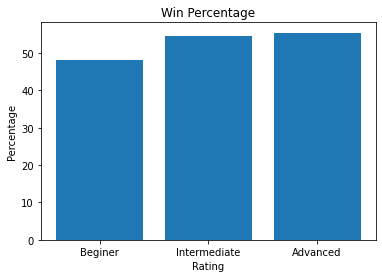

In [31]:
plt.bar(df_ratio['Rating'],df_ratio.win_percentage)
plt.title('Win Percentage')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()

### Inference 
- Win percentage across different ratings is almost the same, with advanced players having the highest win percentage

array([[<AxesSubplot:xlabel='GOLDEARNED', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='TOTALMINIONSKILLED', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='KILLS', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='ASSISTS', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='DEATHS', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='VISIONSCORE', ylabel='GOLDEARNED'>,
        <AxesSubplot:xlabel='TOTALDAMAGEDEALTTOCHAMPIONS', ylabel='GOLDEARNED'>],
       [<AxesSubplot:xlabel='GOLDEARNED', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='TOTALMINIONSKILLED', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='KILLS', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='ASSISTS', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='DEATHS', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='VISIONSCORE', ylabel='TOTALMINIONSKILLED'>,
        <AxesSubplot:xlabel='TOTALDAMAGEDEALTTOCHAMPIONS', ylabel='TOTALMINIONSKILLED'>],
       [<AxesSubpl

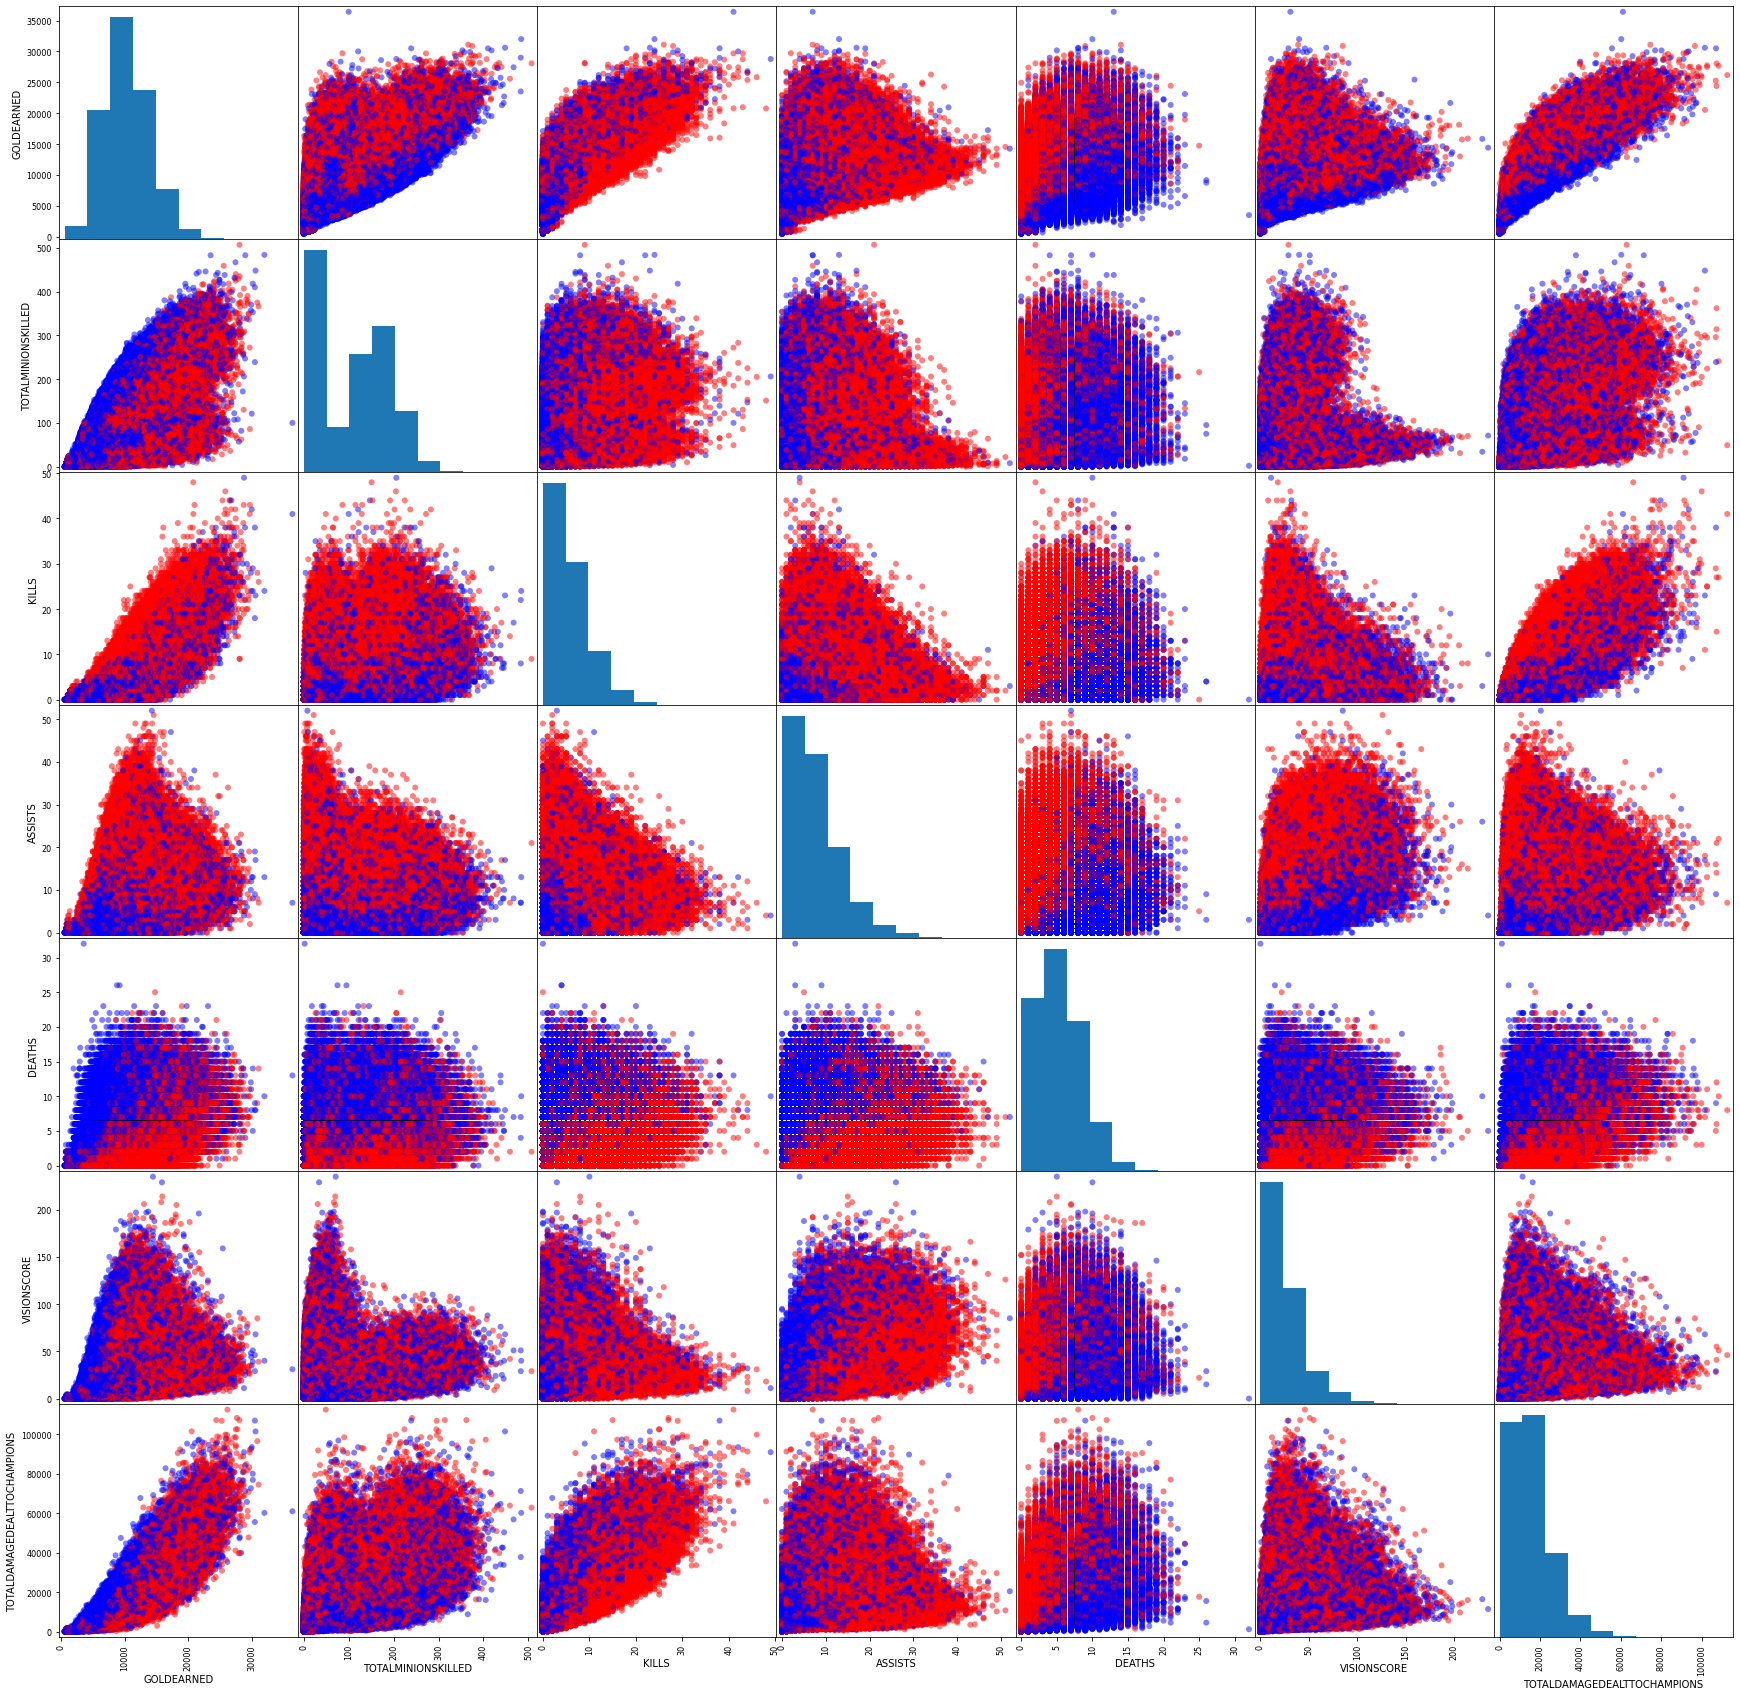

In [30]:
#we are going to set up some colors for attack = 0 (no attack) or 1 (attack)
df_scatter = matches_merged
df_scatter['WIN']=df_scatter['WIN'].astype(int)
attack_colors = {0:'blue', 1:'red'}
pd.plotting.scatter_matrix(df_scatter[['GOLDEARNED', 'TOTALMINIONSKILLED', 'KILLS', 'ASSISTS', 'DEATHS',
       'CHAMPION', 'VISIONSCORE', 'TOTALDAMAGEDEALTTOCHAMPIONS',
       'SUMMONERNAME', 'Region', 'match_id', 'role', 'player_id', 'Rating']],figsize=(30,30),grid=True,
                           marker='o', c= df_scatter['WIN'].map(attack_colors))
